In [91]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

colors =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 'darkslategray', 'olive', '#9467bd', '#8c564b', '#e377c2', 'indigo', '#7f7f7f', '#bcbd22', '#17becf', 'tan', 'saddlebrown', 'darkgreen']
# Set the color cycle
plt.rc('axes', prop_cycle=(cycler('color', colors)))

cmi = {}
mean_corr = {}
var_corr = {}
gap = {}
cmi_traceout = {}
mag = {}

periodic = True
model = "1DJ1J2"
if model == "1DXXZ":
    int_ = "delta"
    param = [1.2, 1.05, 1.01, 1.0, 0.99, 0.8, -0.8, -0.99, -1.0, -1.01, -1.05, -1.2]
elif model == "1DJ1J2":
    int_ = "J2"
    param = [0.2, 0.4, 0.48, 0.52, 0.6, 0.7, 0.9, 1.0, 1.05, 1.15]
elif model == "1DTFIM":
    int_ = "B"
    param =  [-0.2, -0.5, -0.8,-0.9,  -0.95, -0.99, -1.0, -1.01, -1.05, -1.2, -1.5, -2.0, -3.0, -4.0, -6.0]
L = 22
# Looping through the values and loading each file

for b in param:
    filename = f"result/{model}/cmi_{model}_L{L}_{int_}_{b}periodic_{periodic}.npy"
    cmi[b] = np.load(filename)
    if periodic == True:
        cmi[b] = np.flip(cmi[b])
    filename = f"result/{model}/mean_corr_{model}_L{L}_{int_}_{b}periodic_{periodic}.npy"
    mean_corr[b] = np.load(filename)
    if periodic == False:
        filename = f"result/{model}/var_corr_{model}_L{L}_{int_}_{b}periodic_{periodic}.npy"
        var_corr[b] = np.load(filename)
    filename = f"result/{model}/gap_{model}_L{L}_{int_}_{b}periodic_{periodic}.npy"
    gap[b] = np.load(filename)
    filename = f"result/{model}/cmi_traceout_{model}_L{L}_{int_}_{b}periodic_{periodic}.npy"
    cmi_traceout[b] = np.load(filename, allow_pickle=True)
    filename = f"result/{model}/mag_{model}_L{L}_{int_}_{b}periodic_{periodic}.npy"
    mag[b] = np.load(filename)



In [92]:

cmi_length = []
err_cmi_length = []
corre_length = []
err_corre_length = []
cmi_length_traceout = [[] for i in range(len(param))]
err_cmi_length_traceout = [[] for i in range(len(param))]
for i in param:
    cmi[i] = np.abs(cmi[i])
    for j in range(len(cmi_traceout[i])):
        cmi_traceout[i][j] = np.abs(np.array(cmi_traceout[i][j]))
for i in param:
    df = len(cmi[i]) - 2
    (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi[i])), -np.log(cmi[i]), 1, full=True)
    mean_x = np.mean(np.arange(len(cmi[i])))
    err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi[i])) - mean_x) ** 2))
    cmi_length.append(cmi_len)
    err_cmi_length.append(err)

    (corr_len, b2), residuals, _, _, _ = np.polyfit(np.arange(len(mean_corr[i])), -np.log(mean_corr[i]), 1,
                                                    full=True)
    mean_x = np.mean(np.arange(len(mean_corr[i])))
    err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(mean_corr[i])) - mean_x) ** 2))
    corre_length.append(corr_len)
    err_corre_length.append(err)

    for j in range(len(cmi_traceout[i])):
        df = len(cmi_traceout[i][j]) - 2
        (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[i][j])),
                                                       -np.log(cmi_traceout[i][j] + 1e-32), 1, full=True)
        mean_x = np.mean(np.arange(len(cmi_traceout[i][j])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi_traceout[i][j])) - mean_x) ** 2))
        cmi_length_traceout[param.index(i)].append(cmi_len)
        err_cmi_length_traceout[param.index(i)].append(err)

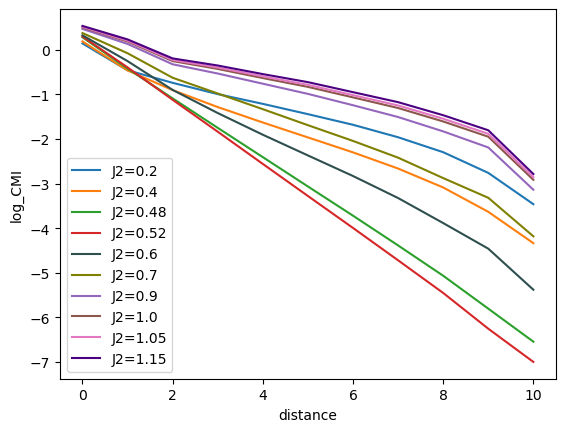

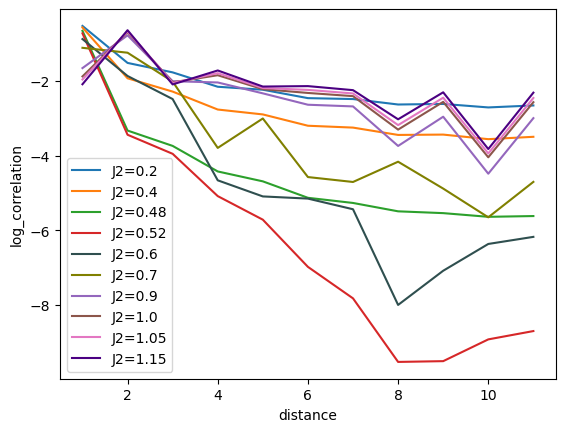

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


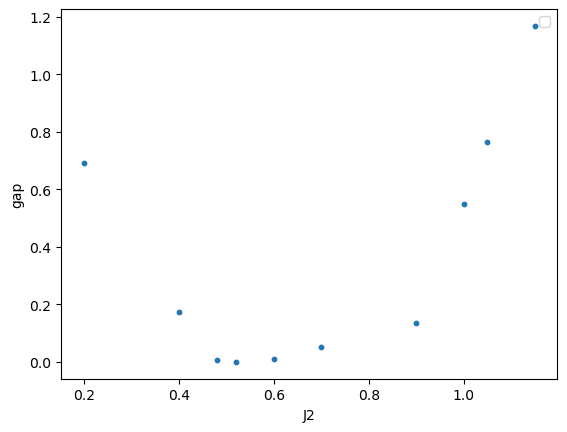

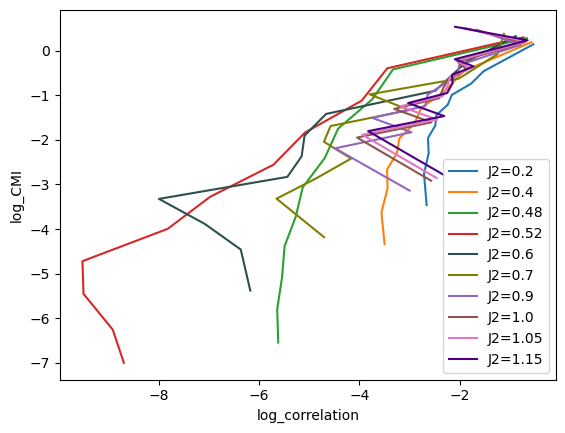

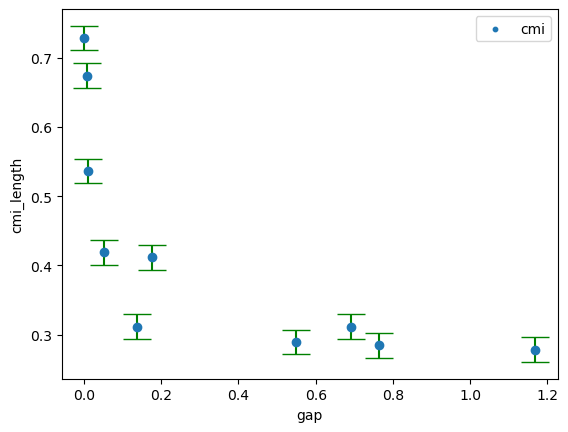

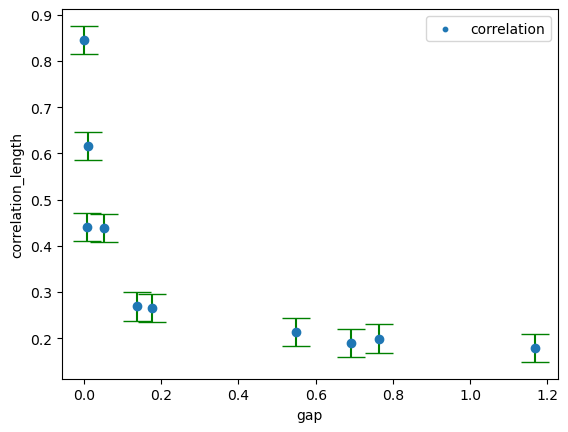

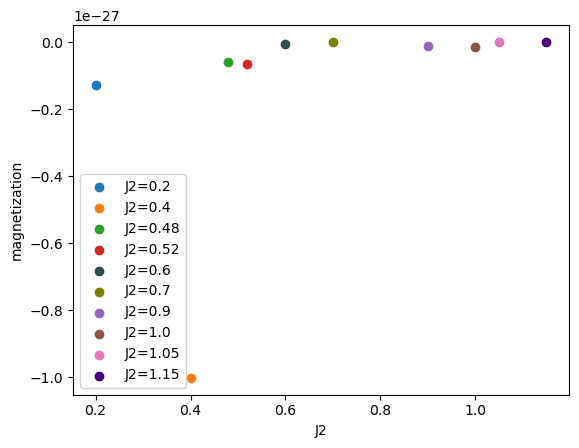

In [93]:

for i in param:
    plt.plot(np.log(cmi[i]), label= int_ +"=" + str(i))
plt.xlabel("distance")
plt.ylabel("log_CMI")
plt.legend()
plt.savefig("figure/"+model+"/cmi_"+model+"_L" + str(L) + "_" + "periodic_" + str(periodic) + ".png")
plt.show()
plt.clf()

for i in param:
    plt.plot(np.arange(len(mean_corr[i]) - 1) + 1, np.log(mean_corr[i][1:]), label= int_ + "=" + str(i))
    if periodic == False:
        plt.fill_between(np.arange(len(mean_corr[i]) - 1) + 1,
                         np.log(mean_corr[i][1:]) - 1 / mean_corr[i][1:] * np.sqrt(var_corr[i][1:]),
                         np.log(mean_corr[i][1:]) + 1 / mean_corr[i][1:] * np.sqrt(var_corr[i][1:]), alpha=0.2)
plt.xlabel("distance")
plt.ylabel("log_correlation")
plt.legend()
plt.savefig(
    "figure/"+model+"/correlation_"+model+"_L" + str(L) + "_" + "periodic_" + str(periodic) + ".png")
plt.show()
plt.clf()


B_ = [param[i] for i in range(len(param))]
plt.scatter(B_, gap.values(), s=10)
plt.xlabel(int_)
plt.ylabel("gap")
plt.legend()
plt.savefig("figure/"+model+"/gap_"+model+"_L" + str(L) +  "_" + "periodic_" + str(periodic) + ".png")
plt.show()
plt.clf()

for i in param:
    plt.plot(np.log(mean_corr[i][1:]), np.log(cmi[i]), label= int_ + "=" + str(i))
    if periodic == False:
        plt.fill_betweenx(np.log(cmi[i]),
                          np.log(mean_corr[i][1:]) - 1 / mean_corr[i][1:] * np.sqrt(var_corr[i][1:]),
                          np.log(mean_corr[i][1:]) + 1 / mean_corr[i][1:] * np.sqrt(var_corr[i][1:]), alpha=0.2)
plt.xlabel("log_correlation")
plt.ylabel("log_CMI")
plt.legend()
plt.savefig(
    "figure/"+model+"/correlation_cmi_"+model+"_L" + str(L) +  "_" + "periodic_" + str(periodic) + ".png")
plt.show()
plt.clf()

gap_list = []
for i in param:
    gap_list.append(gap[i])

plt.scatter(gap_list, cmi_length, label="cmi", s=10)
plt.errorbar(gap_list, cmi_length, yerr=err_cmi_length[:][0], fmt='o', ecolor='g', capthick=1, capsize=10)
plt.xlabel("gap")
plt.ylabel("cmi_length")
plt.legend()
plt.savefig(
    "figure/"+model+"/cmi_length_gap_"+model+"_L" + str(L) +  "_" + "periodic_" + str(periodic) + ".png")
plt.show()
plt.clf()

plt.scatter(gap_list, corre_length, label="correlation", s=10)
plt.errorbar(gap_list, corre_length, yerr=err_corre_length[:][0], fmt='o', ecolor='g', capthick=1, capsize=10)
plt.xlabel("gap")
plt.ylabel("correlation_length")
plt.legend()
plt.savefig("figure/"+model+"/correlation_length_gap_"+model+"_L" + str(L) +  "_"+ "periodic_" + str(
    periodic) + ".png")
plt.show()
plt.clf()

for i in param:
    plt.scatter(i, mag[i], label=int_+"="+str(i))
plt.xlabel(int_)
plt.ylabel("magnetization")
plt.legend()
plt.savefig("figure/"+model+"/mag_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

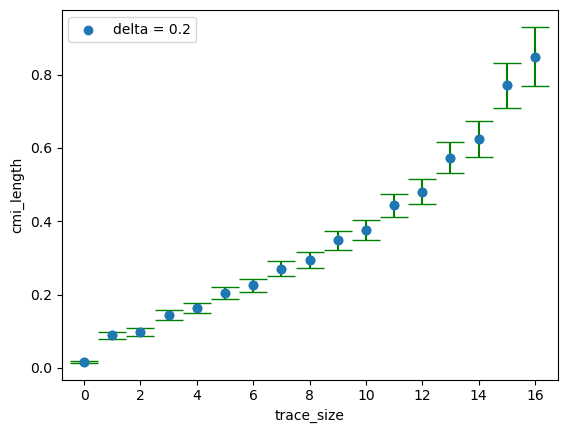

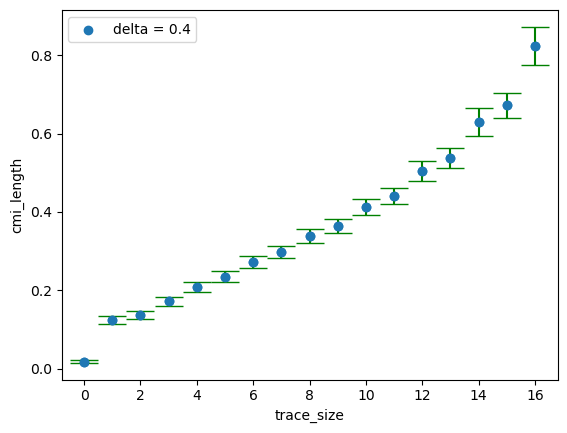

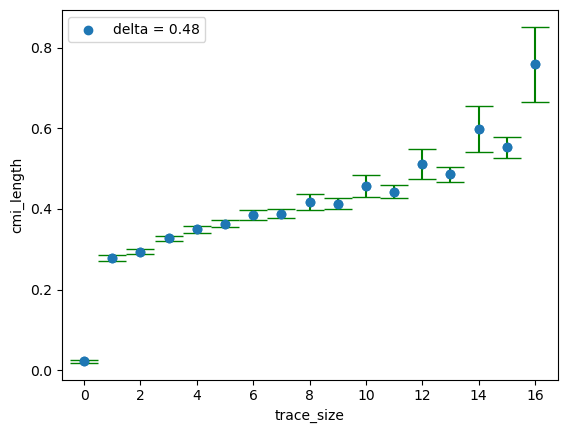

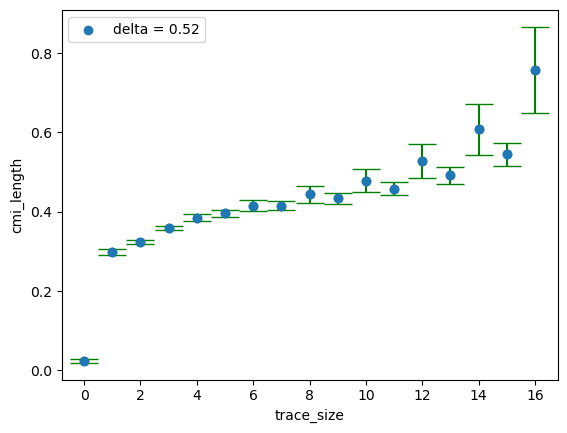

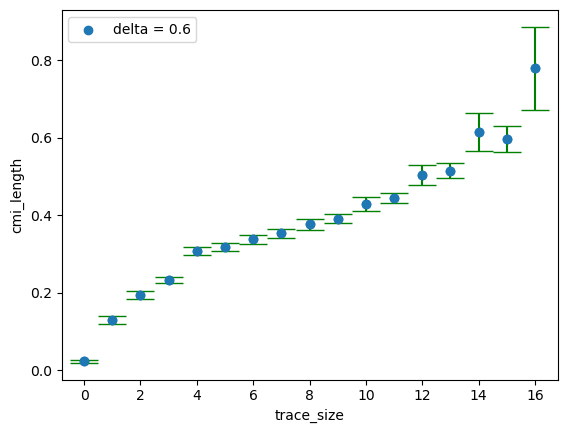

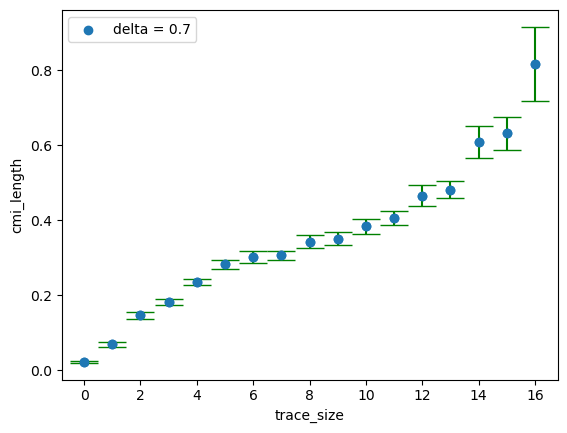

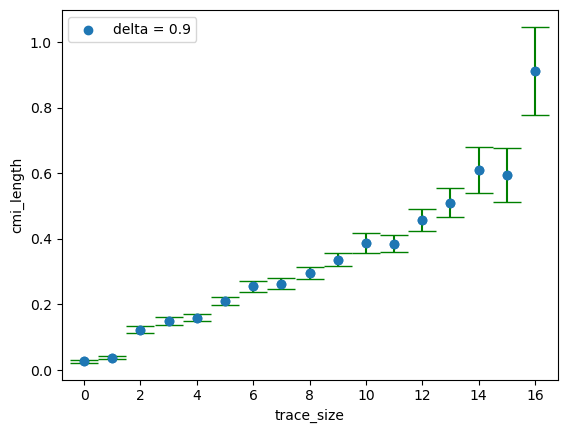

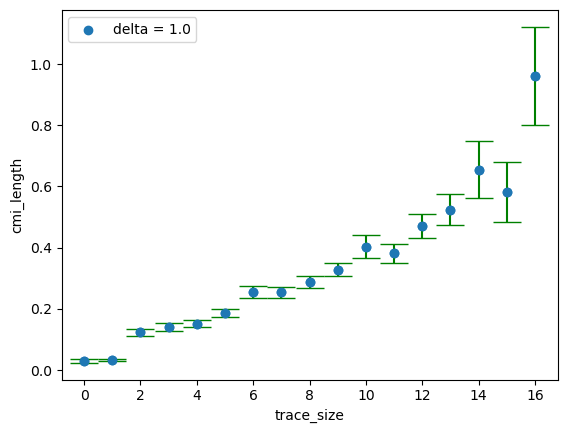

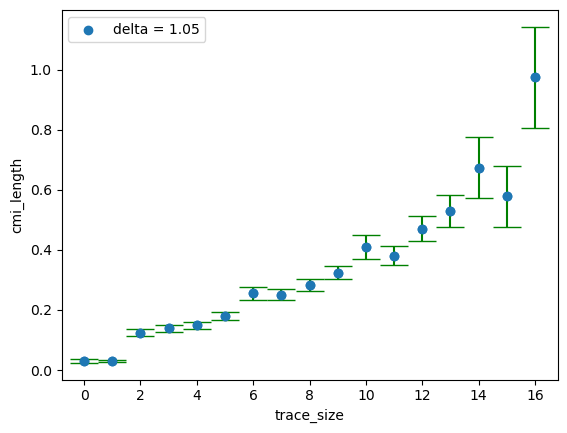

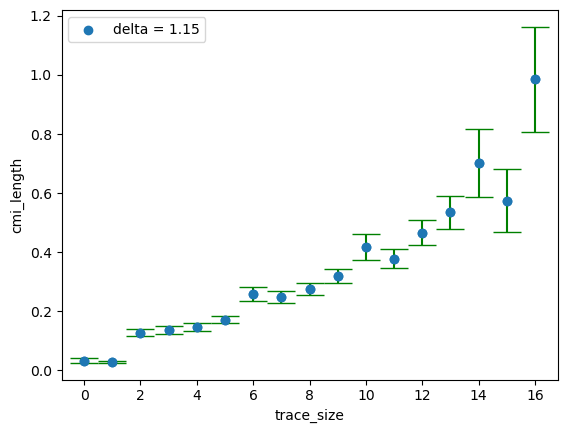

<Figure size 640x480 with 0 Axes>

In [94]:
for i in range(len(param)):
    plt.scatter(np.arange(len(cmi_length_traceout[i])), cmi_length_traceout[i], label="delta = " + str(param[i]))
    plt.errorbar(np.arange(len(cmi_length_traceout[i])), cmi_length_traceout[i],
                 yerr=np.array(err_cmi_length_traceout[i]).ravel(), fmt='o', ecolor='g', capthick=1, capsize=10)
    plt.xlabel("trace_size")
    plt.ylabel("cmi_length")
    plt.legend()
    plt.savefig(
        "figure/"+model+"/traceout/cmi_length_traceout_"+model+"_L" + str(L) +"_"+int_+"_" + str(param[i]) + "periodic_" + str(
            periodic) + ".png")
    plt.show()
    plt.clf()